<a href="https://colab.research.google.com/github/valki45/inteligencia-artificial/blob/main/Clasificaci%C3%B3n_de_un_candidato_a_un_empleo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# Generar dataset sintético con diferentes rangos por habilidad
n_muestras = 5000
# Habilidades técnicas: 70-100
tec = np.random.randint(70, 101, (n_muestras, 6))
# Habilidades matemáticas: 60-90
mat = np.random.randint(60, 91, (n_muestras, 6))
# Habilidades psicológicas: 50-85
psi = np.random.randint(50, 86, (n_muestras, 6))
# Nombres de columnas
columnas = [
    'python', 'sql', 'visualizacion_datos', 'excel', 'manejo_apis', 'nube',
    'estadistica', 'probabilidad', 'algebra_lineal', 'calculo', 'optimizacion', 'modelado',
    'trabajo_equipo', 'comunicacion', 'creatividad', 'adaptabilidad', 'liderazgo', 'resolucion_problemas'
]
# Crear DataFrame
df = pd.DataFrame(np.concatenate([tec, mat, psi], axis=1), columns=columnas)

In [ ]:
import numpy as np
import pandas as pd

# Voy a crear los datos primero, ¡serán 5000 personas!
n_muestras = 5000

# --- Habilidades Técnicas: Les doy puntos altos, entre 70 y 100. ---
tec = np.random.randint(70, 101, (n_muestras, 6))
# --- Habilidades Matemáticas: Un poco más bajas, entre 60 y 90. ---
mat = np.random.randint(60, 91, (n_muestras, 6))
# --- Habilidades Psicológicas: El rango más amplio, entre 50 y 85. ---
psi = np.random.randint(50, 86, (n_muestras, 6))

# Defino los nombres de las 18 columnas para que todo esté ordenado.
columnas = [
    # Las 6 habilidades técnicas
    'python', 'sql', 'visualizacion_datos', 'excel', 'manejo_apis', 'nube',
    # Las 6 habilidades matemáticas
    'estadistica', 'probabilidad', 'algebra_lineal', 'calculo', 'optimizacion', 'modelado',
    # Las 6 habilidades psicológicas
    'trabajo_equipo', 'comunicacion', 'creatividad', 'adaptabilidad', 'liderazgo', 'resolucion_problemas'
]

# ¡Creo mi tabla (DataFrame)! Pongo todas las habilidades una al lado de la otra (axis=1).
df = pd.DataFrame(np.concatenate([tec, mat, psi], axis=1), columns=columnas)

# --- Ahora, ¡a calcular los promedios que me interesan! ---

# Saco el promedio para cada persona (fila) en las habilidades técnicas.
# El 'axis=1' le dice a Python que calcule a lo largo de las filas.
prom_tecnologicas = df[['python', 'sql', 'visualizacion_datos', 'excel', 'manejo_apis', 'nube']].mean(axis=1)

# Lo mismo para las habilidades matemáticas.
prom_matematicas = df[['estadistica', 'probabilidad', 'algebra_lineal', 'calculo', 'optimizacion', 'modelado']].mean(axis=1)

# Y también para las habilidades psicológicas.
prom_psicologicas = df[['trabajo_equipo', 'comunicacion', 'creatividad', 'adaptabilidad', 'liderazgo', 'resolucion_problemas']].mean(axis=1)

# Calculo el promedio final de cada persona, sumando los 3 promedios de grupo y dividiendo entre 3.
prom_total = (prom_tecnologicas + prom_matematicas + prom_psicologicas) / 3

# --- ¡Hora de la etiqueta final (el resultado)! ---

# Aquí defino si la persona es 'Apta' (1) o 'No Apta' (0).
# Si su 'prom_total' es mayor a 75, le pongo un 1; si no, un 0.
# '.astype(int)' es para asegurarme de que el resultado sea un número entero (0 o 1).
y_binario = (prom_total > 75).astype(int)

# Hago 'one-hot encoding'. Esto significa que el 0 se vuelve [1, 0] y el 1 se vuelve [0, 1].
# Esto es muy común para preparar los datos de la 'y' (la variable a predecir) para un modelo de Machine Learning.
y = pd.get_dummies(y_binario).values

In [ ]:
# Divido los datos en entrenamiento y prueba
# Uso el 80% de los datos para entrenar y el 20% para probar el modelo.
# El random_state es solo para que la división sea siempre igual cada vez que se ejecute.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.2, random_state=42
)

# Escalamiento de los datos
# Aplico StandardScaler para que todas las variables tengan media 0 y desviación estándar 1.
# Esto ayuda a que el modelo aprenda mejor y no se vea afectado por variables con diferentes escalas.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Ajusto el escalador solo con los datos de entrenamiento y los transformo.
X_train = scaler.fit_transform(X_train)

# Con los datos de prueba solo aplico la misma transformación,
# sin volver a ajustar el escalador (para evitar usar información del test).
X_test = scaler.transform(X_test)


In [ ]:
# Importo las librerías necesarias de Keras para construir y entrenar la red neuronal
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Defino el modelo secuencial, que básicamente va añadiendo capas una tras otra.
modelo = Sequential([
    # Primera capa oculta con 64 neuronas y activación ReLU.
    # 'input_shape' indica cuántas características tiene cada dato de entrada.
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),

    # Segunda capa oculta con 32 neuronas y activación ReLU.
    Dense(32, activation='relu'),

    # Tercera capa oculta con 16 neuronas y activación ReLU.
    Dense(16, activation='relu'),

    # Capa de salida con 2 neuronas (una por cada clase a predecir) y activación Softmax,
    # que sirve para problemas de clasificación multiclase.
    Dense(2, activation='softmax')
])

# Defino el optimizador Adam con una tasa de aprendizaje de 0.001.
adam = Adam(learning_rate=0.001)

# Compilo el modelo indicando:
# - El optimizador que se usará (Adam).
# - La función de pérdida (categorical_crossentropy) ideal para clasificación multiclase.
# - La métrica de evaluación (accuracy) para medir qué tan bien aprende el modelo.
modelo.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Entrenamiento del modelo
# Uso el método .fit() para entrenar la red neuronal con los datos de entrenamiento.
# - epochs indica cuántas veces el modelo va a pasar por todos los datos.
# - batch_size es el número de muestras que se procesan antes de actualizar los pesos.
# - validation_data me permite evaluar el rendimiento del modelo en los datos de prueba durante el entrenamiento.
# - verbose=1 hace que se muestren los resultados de cada época.
history = modelo.fit(
    X_train, y_train,
    epochs=50,
    batch_size=8,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7715 - loss: 0.4430 - val_accuracy: 0.9620 - val_loss: 0.0884
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9679 - loss: 0.0821 - val_accuracy: 0.9730 - val_loss: 0.0636
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9806 - loss: 0.0489 - val_accuracy: 0.9720 - val_loss: 0.0664
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9816 - loss: 0.0422 - val_accuracy: 0.9750 - val_loss: 0.0677
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9889 - loss: 0.0333 - val_accuracy: 0.9720 - val_loss: 0.0557
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9939 - loss: 0.0227 - val_accuracy: 0.9680 - val_loss: 0.0886
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9910 - loss: 0.0229 - val_accuracy: 0.9780 - val_loss: 0.0606
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9894 - loss: 0.0246 - val_accuracy: 0.

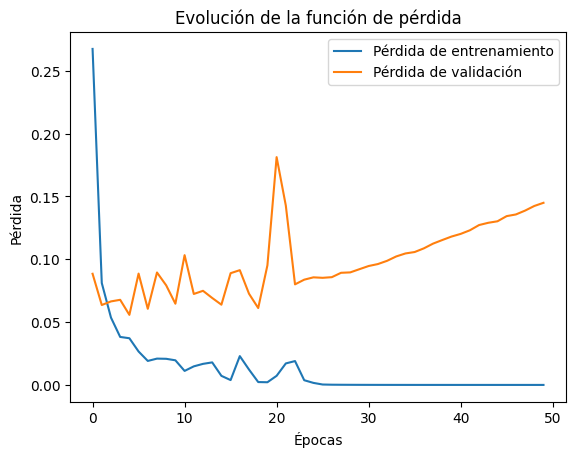

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9700 - loss: 0.1793  

🔹 Loss: 0.1449  |  Accuracy: 0.9740


In [ ]:
# Evaluación del modelo
# Importo matplotlib para graficar los resultados del entrenamiento.
import matplotlib.pyplot as plt

# Grafico cómo fue cambiando la pérdida (loss) tanto en el entrenamiento como en la validación.
# Esto me ayuda a ver si el modelo aprendió bien o si se sobreajustó.
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Evolución de la función de pérdida')
plt.show()

# Evalúo el modelo con los datos de prueba para obtener la pérdida final y la precisión.
loss, acc = modelo.evaluate(X_test, y_test)
print(f"\n🔹 Loss: {loss:.4f}  |  Accuracy: {acc:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


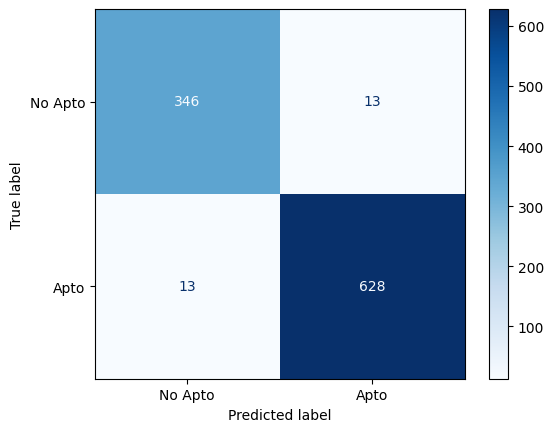


Sensitivity (Recall) por clase:
No Apto: 0.96
Apto: 0.98


In [ ]:
# Matriz de confusión
# Importo las funciones necesarias para evaluar el modelo.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score
import numpy as np

# Obtengo las predicciones del modelo sobre los datos de prueba.
pred = modelo.predict(X_test)

# Con np.argmax convierto las salidas del modelo (probabilidades) en etiquetas de clase.
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Creo la matriz de confusión para comparar las predicciones del modelo con las clases reales.
cm = confusion_matrix(y_true, y_pred)

# Muestro la matriz de confusión de forma visual con etiquetas personalizadas.
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Apto', 'Apto'])
disp.plot(cmap='Blues')
plt.show()

# Calculo la sensibilidad (recall) por clase.
# Esto muestra qué tan bien el modelo identifica correctamente cada clase.
sensitivity = recall_score(y_true, y_pred, average=None)
print("\nSensitivity (Recall) por clase:")
print(f"No Apto: {sensitivity[0]:.2f}")
print(f"Apto: {sensitivity[1]:.2f}")


In [ ]:
# Evaluación de un nuevo candidato
import numpy as np

# Creo un arreglo con las calificaciones del nuevo candidato.
# Agrupo los valores por tipo de habilidad: técnicas, matemáticas y psicológicas.
nuevo_candidato = np.array([[90, 88, 85, 87, 84, 89,   # técnicas
                             82, 86, 85, 83, 87, 80,   # matemáticas
                             70, 75, 80, 72, 78, 74]]) # psicológicas

# Escalo los datos del nuevo candidato con el mismo escalador usado para el entrenamiento.
# Esto es importante para mantener la coherencia con las variables del modelo.
nuevo_candidato_scaled = scaler.transform(nuevo_candidato)

# Hago la predicción con el modelo ya entrenado.
pred_nuevo = modelo.predict(nuevo_candidato_scaled)

# np.argmax selecciona la clase con mayor probabilidad (0 = No Apto, 1 = Apto).
clase_predicha = np.argmax(pred_nuevo)

# Muestro el resultado de la evaluación.
print("Evaluación de nuevo candidato:")
print(f"Resultado: {'Apto' if clase_predicha == 1 else 'No Apto'}")


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
Evaluación de nuevo candidato:
Resultado: Apto
